<a href="https://colab.research.google.com/github/justrelkayam/DesignWaterPressureZone/blob/main/OptiUnitsForStation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

נתקין את החבילות הבאות

In [ ]:
!pip install pulp

In [4]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [43]:
import os
# my_files_folder = MyDrive.UnitsForStation
my_files_folder = '/content/drive/MyDrive/UnitsForStation'



 קלס לגרפיקה

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline  


class PlotByDfColumn(object):
  def __init__(self, df, x, y, plot_type='scatter'):
    self.df = df
    self.x = x
    self.y = y
    self.plot_type = plot_type

  def plot(self):
    if self.plot_type == "scatter":
      self.plot_scatter()

    elif self.plot_type == "line":
      self.plot_line()

  def plot_scatter(self):
    return self.df.plot.scatter(x=self.x , y=self.y, c='DarkBlue')

  def plot_line(self):
    return self.df.plot.line(x=self.x , y=self.y, c='DarkBlue')


קצת תאוריה


  הקשר בין גובה הרמה לספיקה לשלוש יחידות שאיבה שעובדות במקביל מתואר באופן הבא

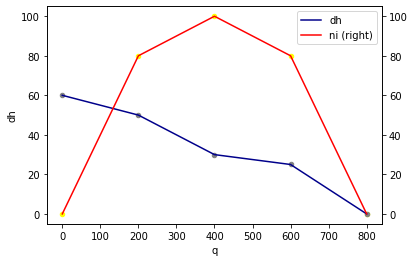

In [41]:
import pandas as pd
data_file = 'curv.xlsx'
data_file = os.path.join(my_files_folder, data_file)

df_data = pd.read_excel(file)
df = df_data.loc[df_data['pump'] == 1]
ax = df.plot.line(x='q', y='dh', c='DarkBlue')
ax2 = df.plot.line(x='q', y='ni', c='red', ax=ax, secondary_y=True)
ax3 = df.plot.scatter(x='q', y='ni', c='yellow', ax=ax, secondary_y=True)
ax4 = df.plot.scatter(x='q', y='dh', c='grey', ax=ax, secondary_y=True)




דוגמה לאופטימיזציה באמצעות PULP


In [42]:
from pulp.constants import LpMaximize
import pulp
from pulp import LpProblem, LpMinimize, LpStatus, lpSum, LpVariable, PULP_CBC_CMD

# Create model
model = LpProblem(name="opti_Q_H", sense=LpMaximize)

# Create decision variables
q_var = LpVariable("q", 0, 100)
dh_var = LpVariable("dh", 0, 50)
ni_var = LpVariable("ni", 0, 100)


# Create objective
model += ni_var 

# Add constraints
model += ni_var  * 30 + dh_var - q_var <= 2000

# Solve model
status = model.solve(PULP_CBC_CMD(msg=False))

# Get results
print(LpStatus[status])
print("")
print(model)

print('dh value', dh_var.value())
print('q value', q_var.value())
print('ni value', ni_var.value())



Optimal

opti_Q_H:
MAXIMIZE
1*ni + 0
SUBJECT TO
_C1: dh + 30 ni - q <= 2000

VARIABLES
dh <= 50 Continuous
ni <= 100 Continuous
q <= 100 Continuous

dh value 0.0
q value 100.0
ni value 70.0
